I recomend installing python using [anaconda](https://docs.anaconda.com/anaconda/install/)

After installation is complete, open jupyter notebook from anaconda  
In windows, it can be found in start menu   

Anaconda comes with lots of modules pre-installed  
In case a module cannot be imported, it can be installed using conda or pip  

`conda install -c conda-forge "MODULE-NAME"` or  
`pip install "MODULE-NAME"` 

If installation is run from a notebook cell add "!" at the beginnig of the line  

`!conda install -c conda-forge "MODULE-NAME"`  
`!pip install "MODULE-NAME"`

- Install the `motuclient` module to download SSH

In [1]:
# !pip install motuclient xarray

Need to create a copernicus account to be able to download SSH data  
Visit https://marine.copernicus.eu/access-data to create an account  
After the account is created and active, define the username and passwd below. 

In [2]:
import os
from datetime import datetime

In [3]:
start_date = datetime(1993, 1, 1)
end_date = datetime(2020, 3, 7)
start_lat = 20
start_lon = 56
end_lat = 63
end_lon = 28
# Indicate the full path where the data will be saved (replace C:\...)
output_dir = r'C:\...'
username = ''
passwd = ''

In [4]:
sdate = start_date.strftime("%Y-%m-%d %H:%M:%S")
edate = end_date.strftime("%Y-%m-%d %H:%M:%S")
fname = 'dataset-duacs-rep-global-merged-twosat-phy-l4_oman.nc'

pwd = f'"{passwd}"' if os.name == 'nt' else f"'{passwd}'"
url = 'python -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu ' \
      '--service-id SEALEVEL_GLO_PHY_CLIMATE_L4_REP_OBSERVATIONS_008_057-TDS ' \
      f'--product-id dataset-duacs-rep-global-merged-twosat-phy-l4 ' \
      f'--longitude-min {start_lon} --longitude-max {end_lon} ' \
      f'--latitude-min {start_lat} --latitude-max {end_lat} --date-min ' \
      f'"{sdate}" --date-max "{edate}" --variable sla --variable ugosa --variable vgosa ' \
      f'--out-dir {output_dir} --out-name {fname} --user {username} --pwd {pwd}'

In [5]:
# !{url}

# Load AVISO satellite data
We use xarray to load the data

In [6]:
import xarray as xr

In [7]:
fname = 'dataset-duacs-rep-global-merged-twosat-phy-l4_oman.nc'
ssh = xr.open_dataset(fname)   # AVISO dataset
ssh

<xarray.Dataset>
Dimensions:    (latitude: 33, longitude: 28, time: 9928)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2020-03-07
  * latitude   (latitude) float32 20.12 20.38 20.62 20.88 ... 27.62 27.88 28.12
  * longitude  (longitude) float32 56.12 56.38 56.62 56.88 ... 62.38 62.62 62.88
Data variables:
    vgosa      (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-03-07T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-03-07T00:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [8]:
# we can also select a specific time interval
# this interval is used for the demos below
ssh = ssh.sel(time=slice('2019-01-01', '2020-01-01'))
ssh

<xarray.Dataset>
Dimensions:    (latitude: 33, longitude: 28, time: 366)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2020-01-01
  * latitude   (latitude) float32 20.12 20.38 20.62 20.88 ... 27.62 27.88 28.12
  * longitude  (longitude) float32 56.12 56.38 56.62 56.88 ... 62.38 62.62 62.88
Data variables:
    vgosa      (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-03-07T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-03-07T00:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [9]:
land = 'oman_landmask.mat'
# using matlab m_map toolbox, can create the oman_landmask.mat land mask
# The commands are as follows (run the two lines below commands in Matlab)
# m_proj('merc', 'lon', [56, 63], 'lat', [20, 28])
# m_gshhs_f('save','oman_landmask');

In [10]:
from scipy import io as sio
def get_patch():
    key = 'ncst'
    coastline = sio.loadmat(
        land, variable_names=[key],
        squeeze_me=True).get(key)
    patch = list(zip(coastline[:, 0], coastline[:, 1]))
    return Polygon(patch, edgecolor='k', linewidth=.2, facecolor='gray')

In [11]:
def add_path(ax):
    poly = get_patch()
    ax.set_aspect(1 / np.cos(np.deg2rad(ssh.latitude.mean())))
    ax.add_patch(poly)
    ax.set_xlim(ssh.longitude.min(), ssh.longitude.max())
    ax.set_xlabel('')
    ax.set_xticks([56, 58, 60, 62])
    ax.set_xticklabels(['56\u00B0E', '58\u00B0E', '60\u00B0E', '62\u00B0E'])
    ax.set_ylim(ssh.latitude.min(), ssh.latitude.max())
    ax.set_yticks([20, 22, 24, 26, 28])
    ax.set_yticklabels(['20\u00B0N', '22\u00B0N', '24\u00B0N', '26\u00B0N', '28\u00B0N'])
    ax.set_ylabel('')
    return ax

In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc, colors
from IPython.display import HTML
import numpy as np
import cmocean as cm

import cartopy.crs as ccrs
import cartopy.feature as cft

In [13]:
%matplotlib notebook
# %matplotlib tk
# %matplotlib inline

In [14]:
def get_slice(t):
    t += 1
    z = ssh.sla.isel(time=slice(t, t + 1)).squeeze()
    z = np.ma.masked_where(np.isnan(z), z)
    u = ssh.ugosa.isel(time=slice(t, t + 1)).squeeze()
    u = np.ma.masked_where(np.isnan(u), u)
    v = ssh.vgosa.isel(time=slice(t, t + 1)).squeeze()
    v = np.ma.masked_where(np.isnan(v), v)
    tm = ssh.time.isel(time=slice(t, t + 1))
    return u, v, z, tm

- Mean EKE

<IPython.core.display.Javascript object>


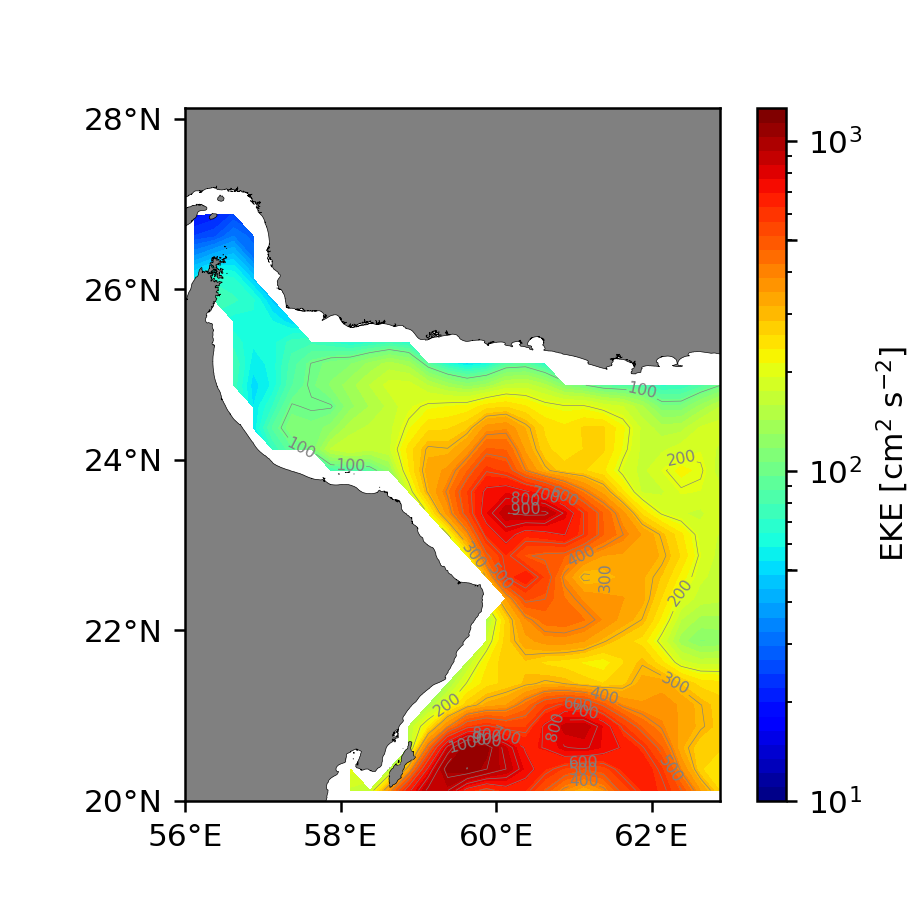

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4.1, 4), dpi=150)

u = np.ma.masked_where(np.isnan(ssh.ugosa), ssh.ugosa) * 100
v = np.ma.masked_where(np.isnan(ssh.vgosa), ssh.vgosa) * 100
eke = ((1/2)*(u**2 + v**2)).mean(axis=0)

x, y = np.meshgrid(ssh.longitude, ssh.latitude)

# CONTOUR
norm = colors.LogNorm(vmin=10, vmax=1200)
levels = np.logspace(1, 3.1)
CF = ax.contourf(x, y, eke, cmap='jet', levels=levels, norm=norm)
CT = ax.contour(x, y, eke, levels=10, linewidths=.2, colors='gray')
ax.clabel(CT, inline=True, fontsize=5, fmt='%g')

# LAND MASK
add_path(ax)

# COLORBAR
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(CF, cax=cax)
cb.set_ticks([10, 50, 100, 500, 1000])
cb.set_label('EKE [cm$^{2}$ s$^{-2}$]')

- Animation EKE

<IPython.core.display.Javascript object>


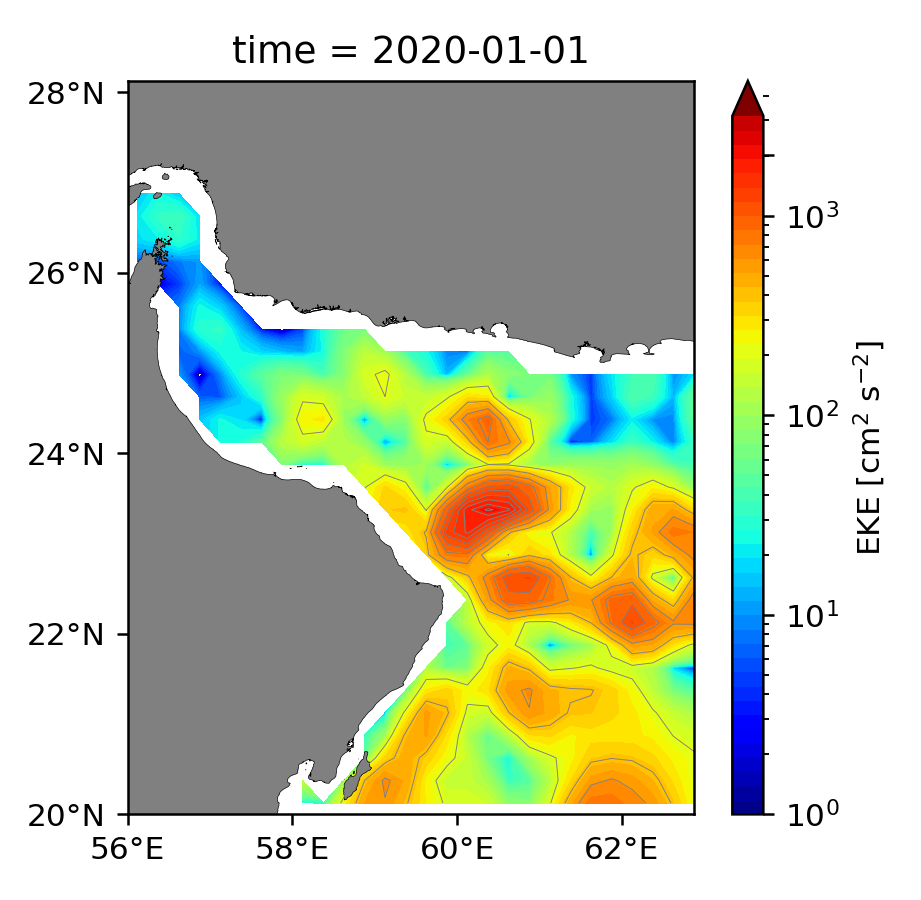

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(4.1, 4), dpi=150)

u, v, _, tm = get_slice(-1)
x, y = np.meshgrid(ssh.longitude, ssh.latitude)

u = np.ma.masked_where(np.isnan(u), u) * 100
v = np.ma.masked_where(np.isnan(v), v) * 100
eke = (1/2)*(u**2 + v**2)

# CONTOUR
norm = colors.LogNorm(vmin=1, vmax=5000)
levels = np.logspace(0, 3.5)
CF = [ax.contourf(x, y, eke, cmap='jet', levels=levels, norm=norm, extend='max')]
CT = [ax.contour(x, y, eke, levels=10, linewidths=.3, colors='gray')]
# ax.clabel(CT, inline=True, fontsize=5, fmt='%g')

# TIME LEGEND
title = f'time = {tm.values[0]}'[:17]
ax.set_title(title)

# LAND MASK
add_path(ax)

# COLORBAR
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(CF[0], cax=cax)
cb.set_ticks([1, 10, 100, 1000, 2000])
cb.set_label('EKE [cm$^{2}$ s$^{-2}$]')


def init_func():
    return [CF, CT]


def update_func(num):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """
    U, V, _, tm = get_slice(num)
    U = np.ma.masked_where(np.isnan(U), U) * 100
    V = np.ma.masked_where(np.isnan(V), V) * 100
    eke = (1/2)*(U**2 + V**2)

    for ct in CT[0].collections:
        ct.remove()
    CT[0] = ax.contour(x, y, eke, levels=10, linewidths=.3, colors='gray')
    
    for cf in CF[0].collections:
        cf.remove()    
    CF[0] = ax.contourf(x, y, eke, cmap='jet', levels=levels, norm=norm, extend='max')
    
    
    title = f'time = {tm.values[0]}'[:17]
    ax.set_title(title)

    return [CF, CT]

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_func, 
#                                fargs=(CT, CF, Q, ax),
                               init_func=init_func,
                               frames=ssh.time.size - 1,
                               interval=50, blit=True, repeat=True)
fig.tight_layout()
plt.show()

# To save the animation, use e.g.
#
anim.save("oman_eddies_eke.gif")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# anim.save("oman_eddies.mp4", writer=writer)

- Animation SSH, U, V

<IPython.core.display.Javascript object>


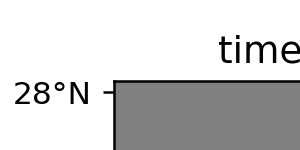

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(4.1, 4), dpi=150)

u, v, z, tm = get_slice(-1)
x, y = np.meshgrid(ssh.longitude, ssh.latitude)
ct_levels = np.arange(-.30, 0.43, .06)
cf_levels = np.arange(-.30, 0.43, .01)

# CONTOUR
norm = colors.TwoSlopeNorm(vmin=-.3, vcenter=0, vmax=.4)
CF = [ax.contourf(x, y, z, cmap='RdBu_r', levels=cf_levels, norm=norm)]
CT = [ax.contour(x, y, z, levels=ct_levels, linewidths=.2, colors='gray')]

# QUIVER
Q = ax.quiver(x, y, u, v, pivot='mid', color='k', zorder=3,
               units='inches', scale=1/0.3, width=0.01)
qk = ax.quiverkey(Q, 0.5, 0.8, 0.5, r'$0.5\ m\ s^{-1}$', 
                  labelpos='E', coordinates='figure')

# TIME LEGEND
title = f'time = {tm.values[0]}'[:17]
ax.set_title(title)
ax.text(58, 26.1, 'SLA C.I.: $-$30:6:42 cm')
add_path(ax)

# COLORBAR
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(CF[0], cax=cax)
cb.set_ticks(np.arange(-.24, 0.46, .12))
cb.set_label(f'{ssh.sla.long_name} [{ssh.sla.units}]')


def init_func():
    return [Q, CF, CT]


def update_func(num):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """
    U, V, Z, tm = get_slice(num)
    for ct in CT[0].collections:
        ct.remove()
    CT[0] = ax.contour(x, y, Z, levels=ct_levels, linewidths=.5, colors='gray')
    for cf in CF[0].collections:
        cf.remove()    
    CF[0] = ax.contourf(x, y, Z, cmap='RdBu_r', levels=cf_levels, norm=norm)
    Q.set_UVC(U, V)
    
    
    title = f'time = {tm.values[0]}'[:17]
    ax.set_title(title)

    return [Q, CF, CT]

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_func, 
#                                fargs=(CT, CF, Q, ax),
                               init_func=init_func,
                               frames=ssh.time.size - 1,
                               interval=50, blit=True, repeat=True)
fig.tight_layout()
plt.show()

anim.save("oman_eddies_sla.gif")

In [18]:
HTML(anim.to_html5_video())